In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [15]:
#https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf

In [2]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)


32033

In [4]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [7]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:
# for w in words:
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
... ---> a
..a ---> v
.av ---> a
ava ---> .
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [8]:
X.shape, X.dtype, Y.shape, Y.dtype


(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [9]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [10]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [13]:
#we have only 27 chars and let's built them into 2 dimensional spaces
C = torch.randn((27,2))

In [14]:
C

tensor([[ 1.1957, -2.1673],
        [-0.3956, -0.0066],
        [-0.0786,  1.4615],
        [ 1.3383,  0.7616],
        [-0.3326,  1.3275],
        [-0.1040, -1.0013],
        [-1.5922,  0.3536],
        [ 0.9816, -0.2930],
        [-0.2966, -0.7908],
        [-1.6470, -0.2612],
        [ 0.2291, -0.8499],
        [ 0.0278,  0.6950],
        [-0.1551,  1.5663],
        [ 0.4203,  0.0564],
        [ 0.4535,  1.5513],
        [ 2.3978, -0.9325],
        [ 1.2305,  0.0036],
        [ 1.1609, -2.0430],
        [ 0.5239,  0.1669],
        [ 0.2490, -1.9317],
        [-0.1980, -1.4964],
        [ 2.3916, -0.7033],
        [ 0.4989, -1.5383],
        [-0.4678,  1.2045],
        [-0.6293, -0.4576],
        [-0.4203, -1.0721],
        [-0.5872,  0.3644]])

In [20]:
C[5]

tensor([-0.1040, -1.0013])

In [25]:
C[[5,6,7]]

tensor([[-0.1040, -1.0013],
        [-1.5922,  0.3536],
        [ 0.9816, -0.2930]])

In [26]:
C[torch.tensor([5,6,7])]

tensor([[-0.1040, -1.0013],
        [-1.5922,  0.3536],
        [ 0.9816, -0.2930]])

In [27]:
F.one_hot(torch.tensor(5), num_classes=27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [28]:
F.one_hot(torch.tensor(5), num_classes=27).shape

torch.Size([27])

In [29]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.1040, -1.0013])

In [30]:
torch.tensor([5,6,7,7,7,7])

tensor([5, 6, 7, 7, 7, 7])

In [31]:
C[torch.tensor([5,6,7,7,7,7])]

tensor([[-0.1040, -1.0013],
        [-1.5922,  0.3536],
        [ 0.9816, -0.2930],
        [ 0.9816, -0.2930],
        [ 0.9816, -0.2930],
        [ 0.9816, -0.2930]])

In [32]:
X.shape

torch.Size([32, 3])

In [33]:
C[X].shape

torch.Size([32, 3, 2])

In [34]:
C[X]

tensor([[[ 1.1957, -2.1673],
         [ 1.1957, -2.1673],
         [ 1.1957, -2.1673]],

        [[ 1.1957, -2.1673],
         [ 1.1957, -2.1673],
         [-0.1040, -1.0013]],

        [[ 1.1957, -2.1673],
         [-0.1040, -1.0013],
         [ 0.4203,  0.0564]],

        [[-0.1040, -1.0013],
         [ 0.4203,  0.0564],
         [ 0.4203,  0.0564]],

        [[ 0.4203,  0.0564],
         [ 0.4203,  0.0564],
         [-0.3956, -0.0066]],

        [[ 1.1957, -2.1673],
         [ 1.1957, -2.1673],
         [ 1.1957, -2.1673]],

        [[ 1.1957, -2.1673],
         [ 1.1957, -2.1673],
         [ 2.3978, -0.9325]],

        [[ 1.1957, -2.1673],
         [ 2.3978, -0.9325],
         [-0.1551,  1.5663]],

        [[ 2.3978, -0.9325],
         [-0.1551,  1.5663],
         [-1.6470, -0.2612]],

        [[-0.1551,  1.5663],
         [-1.6470, -0.2612],
         [ 0.4989, -1.5383]],

        [[-1.6470, -0.2612],
         [ 0.4989, -1.5383],
         [-1.6470, -0.2612]],

        [[ 0.4989, -1

In [35]:
X[13,2]

tensor(1)

In [37]:
#this is the embedding of 13 by 2
C[X][13,2]

tensor([-0.3956, -0.0066])

In [102]:
C[1]

tensor([-0.2438,  0.5232])

In [38]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [40]:
emb
#2 dimenstional space and 3 of them

tensor([[[ 1.1957, -2.1673],
         [ 1.1957, -2.1673],
         [ 1.1957, -2.1673]],

        [[ 1.1957, -2.1673],
         [ 1.1957, -2.1673],
         [-0.1040, -1.0013]],

        [[ 1.1957, -2.1673],
         [-0.1040, -1.0013],
         [ 0.4203,  0.0564]],

        [[-0.1040, -1.0013],
         [ 0.4203,  0.0564],
         [ 0.4203,  0.0564]],

        [[ 0.4203,  0.0564],
         [ 0.4203,  0.0564],
         [-0.3956, -0.0066]],

        [[ 1.1957, -2.1673],
         [ 1.1957, -2.1673],
         [ 1.1957, -2.1673]],

        [[ 1.1957, -2.1673],
         [ 1.1957, -2.1673],
         [ 2.3978, -0.9325]],

        [[ 1.1957, -2.1673],
         [ 2.3978, -0.9325],
         [-0.1551,  1.5663]],

        [[ 2.3978, -0.9325],
         [-0.1551,  1.5663],
         [-1.6470, -0.2612]],

        [[-0.1551,  1.5663],
         [-1.6470, -0.2612],
         [ 0.4989, -1.5383]],

        [[-1.6470, -0.2612],
         [ 0.4989, -1.5383],
         [-1.6470, -0.2612]],

        [[ 0.4989, -1

In [41]:
#use 100 neuron for now
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [42]:
#This is roughly what we need to do
emb @ W1 + b1


RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [44]:
emb[:,0, :]

tensor([[ 1.1957, -2.1673],
        [ 1.1957, -2.1673],
        [ 1.1957, -2.1673],
        [-0.1040, -1.0013],
        [ 0.4203,  0.0564],
        [ 1.1957, -2.1673],
        [ 1.1957, -2.1673],
        [ 1.1957, -2.1673],
        [ 2.3978, -0.9325],
        [-0.1551,  1.5663],
        [-1.6470, -0.2612],
        [ 0.4989, -1.5383],
        [ 1.1957, -2.1673],
        [ 1.1957, -2.1673],
        [ 1.1957, -2.1673],
        [-0.3956, -0.0066],
        [ 1.1957, -2.1673],
        [ 1.1957, -2.1673],
        [ 1.1957, -2.1673],
        [-1.6470, -0.2612],
        [ 0.2490, -1.9317],
        [-0.3956, -0.0066],
        [-0.0786,  1.4615],
        [-0.1040, -1.0013],
        [-0.1551,  1.5663],
        [ 1.1957, -2.1673],
        [ 1.1957, -2.1673],
        [ 1.1957, -2.1673],
        [ 0.2490, -1.9317],
        [ 2.3978, -0.9325],
        [ 1.2305,  0.0036],
        [-0.2966, -0.7908]])

In [43]:
emb[:,0, :].shape

torch.Size([32, 2])

In [45]:
emb[:,0, :], emb[:,1, :], emb[:,2, :]

(tensor([[ 1.1957, -2.1673],
         [ 1.1957, -2.1673],
         [ 1.1957, -2.1673],
         [-0.1040, -1.0013],
         [ 0.4203,  0.0564],
         [ 1.1957, -2.1673],
         [ 1.1957, -2.1673],
         [ 1.1957, -2.1673],
         [ 2.3978, -0.9325],
         [-0.1551,  1.5663],
         [-1.6470, -0.2612],
         [ 0.4989, -1.5383],
         [ 1.1957, -2.1673],
         [ 1.1957, -2.1673],
         [ 1.1957, -2.1673],
         [-0.3956, -0.0066],
         [ 1.1957, -2.1673],
         [ 1.1957, -2.1673],
         [ 1.1957, -2.1673],
         [-1.6470, -0.2612],
         [ 0.2490, -1.9317],
         [-0.3956, -0.0066],
         [-0.0786,  1.4615],
         [-0.1040, -1.0013],
         [-0.1551,  1.5663],
         [ 1.1957, -2.1673],
         [ 1.1957, -2.1673],
         [ 1.1957, -2.1673],
         [ 0.2490, -1.9317],
         [ 2.3978, -0.9325],
         [ 1.2305,  0.0036],
         [-0.2966, -0.7908]]),
 tensor([[ 1.1957, -2.1673],
         [ 1.1957, -2.1673],
         [-0

In [46]:
emb[:,1,:].shape

torch.Size([32, 2])

In [47]:
torch.cat([emb[:,0, :], emb[:,1, :], emb[:,2, :]],1).shape

torch.Size([32, 6])

In [48]:
torch.cat(torch.unbind(emb, 1),1)

tensor([[ 1.1957, -2.1673,  1.1957, -2.1673,  1.1957, -2.1673],
        [ 1.1957, -2.1673,  1.1957, -2.1673, -0.1040, -1.0013],
        [ 1.1957, -2.1673, -0.1040, -1.0013,  0.4203,  0.0564],
        [-0.1040, -1.0013,  0.4203,  0.0564,  0.4203,  0.0564],
        [ 0.4203,  0.0564,  0.4203,  0.0564, -0.3956, -0.0066],
        [ 1.1957, -2.1673,  1.1957, -2.1673,  1.1957, -2.1673],
        [ 1.1957, -2.1673,  1.1957, -2.1673,  2.3978, -0.9325],
        [ 1.1957, -2.1673,  2.3978, -0.9325, -0.1551,  1.5663],
        [ 2.3978, -0.9325, -0.1551,  1.5663, -1.6470, -0.2612],
        [-0.1551,  1.5663, -1.6470, -0.2612,  0.4989, -1.5383],
        [-1.6470, -0.2612,  0.4989, -1.5383, -1.6470, -0.2612],
        [ 0.4989, -1.5383, -1.6470, -0.2612, -0.3956, -0.0066],
        [ 1.1957, -2.1673,  1.1957, -2.1673,  1.1957, -2.1673],
        [ 1.1957, -2.1673,  1.1957, -2.1673, -0.3956, -0.0066],
        [ 1.1957, -2.1673, -0.3956, -0.0066,  0.4989, -1.5383],
        [-0.3956, -0.0066,  0.4989, -1.5

In [49]:
a=torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [50]:
a.shape

torch.Size([18])

In [51]:
a.view(2,9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [52]:
a.storage()

/var/folders/fg/hnhxry_n7ndd3bn8c8qv4fww0000gn/T/ipykernel_45651/214256462.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [54]:
emb.shape

torch.Size([32, 3, 2])

In [55]:
emb.view(32,6)

tensor([[ 1.1957, -2.1673,  1.1957, -2.1673,  1.1957, -2.1673],
        [ 1.1957, -2.1673,  1.1957, -2.1673, -0.1040, -1.0013],
        [ 1.1957, -2.1673, -0.1040, -1.0013,  0.4203,  0.0564],
        [-0.1040, -1.0013,  0.4203,  0.0564,  0.4203,  0.0564],
        [ 0.4203,  0.0564,  0.4203,  0.0564, -0.3956, -0.0066],
        [ 1.1957, -2.1673,  1.1957, -2.1673,  1.1957, -2.1673],
        [ 1.1957, -2.1673,  1.1957, -2.1673,  2.3978, -0.9325],
        [ 1.1957, -2.1673,  2.3978, -0.9325, -0.1551,  1.5663],
        [ 2.3978, -0.9325, -0.1551,  1.5663, -1.6470, -0.2612],
        [-0.1551,  1.5663, -1.6470, -0.2612,  0.4989, -1.5383],
        [-1.6470, -0.2612,  0.4989, -1.5383, -1.6470, -0.2612],
        [ 0.4989, -1.5383, -1.6470, -0.2612, -0.3956, -0.0066],
        [ 1.1957, -2.1673,  1.1957, -2.1673,  1.1957, -2.1673],
        [ 1.1957, -2.1673,  1.1957, -2.1673, -0.3956, -0.0066],
        [ 1.1957, -2.1673, -0.3956, -0.0066,  0.4989, -1.5383],
        [-0.3956, -0.0066,  0.4989, -1.5

In [56]:
emb.view(32,6) == torch.cat(torch.unbind(emb, 1),1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [57]:
h = emb.view(32, 6) @ W1 + b1

In [59]:
h.shape

torch.Size([32, 100])

In [60]:
h = emb.view(emb.shape[0], 6) @ W1 + b1

In [61]:
h = emb.view(-1, 6) @ W1 + b1

In [62]:
h


tensor([[ 4.5735, -5.9083, -5.1397,  ..., -4.6084,  6.9872, -3.5683],
        [ 4.6327, -3.2533, -1.8361,  ..., -3.4910,  7.4922, -0.6536],
        [ 2.5523, -2.1402,  0.1996,  ..., -1.3474,  2.3917,  0.2061],
        ...,
        [ 4.4098,  1.2462, -3.5640,  ...,  0.1050, -0.3748,  1.8585],
        [ 2.8524,  2.9798, -0.0270,  ..., -0.8163,  0.0138,  1.8906],
        [ 0.0589, -0.6706,  2.3360,  ..., -1.9761, -0.5262, -1.0208]])

In [63]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)


In [64]:
h.shape

torch.Size([32, 100])

In [65]:
b1.shape

torch.Size([100])

In [67]:
#broadcasting will align on the right
#32, 100
#1,  100

In [68]:
#let's create another layer now

In [69]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [70]:
logits = h @ W2 + b2


In [71]:
logits.shape

torch.Size([32, 27])

In [72]:
logits

tensor([[ 6.4742e+00, -2.1657e+01,  1.7162e+01, -1.6536e+01, -2.1659e+00,
         -1.6636e+01,  5.3752e-01,  7.4699e+00, -1.3958e+01, -1.7058e+00,
         -2.1090e+00,  5.4432e+00,  6.2383e-01, -2.1843e+01,  4.1836e+00,
         -9.6493e+00,  1.2213e+01,  1.0616e+00,  2.3141e+00,  3.9245e+00,
          3.2104e+00, -8.7492e+00, -6.4961e+00,  9.8102e+00,  2.5820e+00,
          1.7052e+01,  2.7825e+00],
        [ 4.4661e+00, -2.3701e+01,  1.7112e+01, -1.6351e+01,  1.3408e-01,
         -1.2885e+01,  1.5228e+00,  1.8704e+00, -1.2181e+01,  3.1879e+00,
          2.3195e+00, -7.0245e-01,  6.4852e-01, -1.6350e+01,  8.0335e-01,
         -1.2122e+01,  1.3095e+01, -6.6385e+00, -5.2013e-01,  2.0154e+00,
          3.2763e+00, -1.2380e+01, -4.1134e+00,  6.7147e+00,  1.6045e+00,
          1.3899e+01,  1.0285e+01],
        [ 1.4806e+00, -1.9670e+01,  1.1423e+01, -4.6081e+00,  2.2318e+00,
         -5.0009e+00, -6.3772e+00,  1.3266e+00, -1.0573e+01,  2.2549e+00,
          4.5492e+00, -5.2679e+00,  5.44

In [73]:
counts = logits.exp()


In [74]:
prob = counts / counts.sum(1, keepdims=True)


In [75]:
prob.shape


torch.Size([32, 27])

In [130]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [131]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [76]:
prob[torch.arange(32), Y]

tensor([1.1018e-15, 2.7698e-15, 2.3730e-11, 2.7174e-07, 1.4939e-10, 1.1924e-12,
        3.3474e-05, 2.4640e-07, 1.3553e-05, 1.3109e-07, 2.3296e-07, 4.5178e-10,
        7.2675e-18, 3.6772e-06, 1.6310e-13, 1.2988e-08, 3.3592e-09, 1.9095e-02,
        2.0768e-17, 8.3274e-02, 1.4054e-08, 2.6610e-07, 1.7764e-08, 1.4027e-03,
        5.6335e-10, 9.3635e-07, 5.0501e-13, 9.0576e-08, 3.9896e-05, 4.4198e-06,
        1.2228e-21, 2.1184e-08])

In [77]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(19.8927)

In [54]:
# ------------ now made respectable :) ---------------


In [78]:
X.shape, Y.shape # dataset


(torch.Size([32, 3]), torch.Size([32]))

In [79]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [80]:
sum(p.nelement() for p in parameters) # number of parameters in total


3481

In [81]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
counts = logits.exp()
prob = counts / counts.sum (1, keepdims=True)
loss = -prob[torch.arange (32), Y]. log(). mean ()
loss

tensor(17.7697)

In [82]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
# counts = logits.exp()
# prob = counts / counts.sum (1, keepdims=True)
# loss = -prob[torch.arange (32), Y]. log(). mean ()
F.cross_entropy(logits, Y)
# loss

tensor(17.7697)

In [83]:
logits = torch. tensor ([-2, -3, 0, 5])
counts = logits.exp()
probs = counts / counts. sum ()

probs

tensor([9.0466e-04, 3.3281e-04, 6.6846e-03, 9.9208e-01])

In [85]:
logits = torch. tensor ([-5, -3, 0, 100])
counts = logits.exp()
probs = counts / counts. sum ()

probs

tensor([0., 0., 0., nan])

In [86]:
logits = torch. tensor ([-5, -3, 0, 100]) -100 
counts = logits.exp()
probs = counts / counts. sum ()

probs

tensor([0.0000e+00, 1.4013e-45, 3.7835e-44, 1.0000e+00])

In [87]:
#so better use cross_entropy

In [88]:
#let's setup the neural network

In [92]:
for p in parameters:
    p.requires_grad = True

In [94]:
for _ in range(100):
    #forward pass
    emb = C[X] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    # print(loss.items())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    for p in parameters:
        p.data += -0.1 * p.grad



3.985849142074585
3.602830410003662
3.2621419429779053
2.961381196975708
2.6982970237731934
2.469712734222412
2.271660804748535
2.1012840270996094
1.957176923751831
1.8374861478805542
1.7380965948104858
1.653511881828308
1.5790901184082031
1.511767029762268
1.4496052265167236
1.3913124799728394
1.3359930515289307
1.2830536365509033
1.232191801071167
1.1833821535110474
1.1367992162704468
1.0926648378372192
1.0510929822921753
1.0120275020599365
0.9752705693244934
0.9405568242073059
0.9076130986213684
0.8761922121047974
0.8460891246795654
0.8171360492706299
0.78919917345047
0.7621749043464661
0.7359816431999207
0.7105581760406494
0.6858612298965454
0.6618653535842896
0.6385658383369446
0.6159819960594177
0.594166100025177
0.5732106566429138
0.5532564520835876
0.5344885587692261
0.5171172022819519
0.501331627368927
0.48724299669265747
0.4748406410217285
0.4639979302883148
0.45451465249061584
0.4461711645126343
0.43876639008522034
0.4321332573890686
0.4261389970779419
0.4206800162792206
0.4

In [95]:
logits.max(1)

torch.return_types.max(
values=tensor([11.4056, 13.2839, 19.0095, 17.7593, 12.9712, 11.4056, 13.1443, 11.7389,
        13.6228, 15.5924, 12.7179, 17.7828, 11.4056, 12.9591, 14.1629, 17.1673,
        11.4056, 13.9451, 11.5875, 13.3441, 15.9006, 12.3487,  8.0381,  8.0298,
        13.9526, 11.4056, 13.3292, 13.7648, 11.3003, 14.3217, 15.7601, 12.2277],
       grad_fn=<MaxBackward0>),
indices=tensor([ 1, 13, 13,  1,  0,  1, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  1, 19,
         1,  2,  5, 12, 12,  1,  0,  1, 15, 16,  8,  9,  1,  0]))

In [96]:
Y


tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [118]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
# for w in words:
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [119]:
X.shape

torch.Size([228146, 3])

In [120]:
Y.shape

torch.Size([228146])

In [121]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [122]:
for p in parameters:
    p.requires_grad = True

In [105]:
for _ in range(100):
    #forward pass
    emb = C[X] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    # print(loss.items())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    for p in parameters:
        p.data += -0.1 * p.grad



19.505229949951172
17.08449363708496
15.776532173156738
14.833338737487793
14.002596855163574
13.253254890441895
12.579914093017578
11.983097076416016
11.470492362976074
11.051855087280273
10.709586143493652
10.407631874084473
10.127808570861816
9.86436653137207
9.61450481414795
9.37644100189209
9.148946762084961
8.931112289428711
8.722232818603516
8.52175235748291
8.329231262207031
8.144328117370605
7.966794967651367
7.796453952789307
7.633190155029297
7.476911544799805
7.327526092529297
7.184889316558838
7.048795700073242
6.918957233428955
6.795023441314697
6.676609039306641
6.563324451446533
6.454794406890869
6.350674152374268
6.250648498535156
6.154437065124512
6.061790943145752
5.97248649597168
5.8863325119018555
5.803152561187744
5.7227888107299805
5.645099639892578
5.569951057434082
5.497217178344727
5.426784038543701
5.358540058135986
5.292379856109619
5.228207588195801
5.1659321784973145
5.105472087860107
5.046751499176025
4.989702224731445
4.93426513671875
4.880383491516113
4

In [106]:
torch.randint(0, 5, (32,))

tensor([0, 3, 4, 2, 3, 0, 0, 4, 2, 2, 3, 2, 3, 4, 1, 2, 3, 3, 4, 2, 4, 4, 2, 4,
        4, 4, 4, 3, 4, 3, 3, 3])

In [107]:
torch.randint(0, X.shape[0], (32,))

tensor([  2900, 120686,  80095, 174969, 218992, 209627, 133276, 221345,  11784,
        141451, 217614,  83530, 198895,  73406,  92072,  33977,  11920,  56037,
         73089, 114759, 151478, 226894, 204362,  83169, 181104, 184128,  18524,
        123908,  91041,  54593, 103117, 142977])

In [123]:
for _ in range(100):
    #forward pass
    #mini batch construct
    ix = torch.randint(0, X.shape[0], (32,))
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    # print(loss.item())
    # print(loss.items())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    for p in parameters:
        p.data += -1 * p.grad
    print(loss.item())


18.855751037597656
16.1151065826416
12.211503982543945
12.242989540100098
12.051032066345215
12.312308311462402
13.12167739868164
14.550500869750977
12.084914207458496
12.37430477142334
11.35415267944336
9.194160461425781
10.079974174499512
8.87128734588623
10.574071884155273
12.649991035461426
10.702606201171875
8.97557544708252
8.078207969665527
7.970635414123535
8.245614051818848
9.573878288269043
8.52271842956543
10.390193939208984
8.915169715881348
9.090313911437988
9.074974060058594
7.912416934967041
7.456697463989258
8.602275848388672
8.912569999694824
10.203804969787598
12.712469100952148
7.811520576477051
7.751913547515869
9.810456275939941
8.2626953125
8.833465576171875
7.982049465179443
11.039381980895996
11.347002983093262
9.244261741638184
7.718142986297607
8.661053657531738
7.619826316833496
8.079877853393555
11.53400993347168
10.885578155517578
7.7886786460876465
9.189437866210938
8.013039588928223
6.731295585632324
8.003883361816406
7.357973098754883
6.913865566253662
7

In [115]:
#Becasue we are on many batches, the quality of our gradient is lower
#it's not the actual gradient direction

In [116]:
#However, this is only the loss of the mini batch, let's evaluate the actual loss

In [117]:
#get loss for all X and all Y
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.7149, grad_fn=<NllLossBackward0>)

In [166]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
# for w in words:
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [167]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [168]:
for p in parameters:
    p.requires_grad = True

In [169]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
# lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [170]:
lri = []
lossi = []
lrie =[]
for i in range(1000):
    #forward pass
    ix = torch.randint(0, X.shape[0], (32,))
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
    lri.append(lrs[i])
    lrie.append(lre[i])

    lossi.append(loss.item())
print(loss.item())

16.425140380859375
19.994050979614258
17.5355167388916
18.12468719482422
21.05748176574707
18.595661163330078
20.934772491455078
19.572364807128906
22.06220054626465
19.218887329101562
21.013465881347656
19.395599365234375
18.98640251159668
19.90423583984375
20.212522506713867
16.350210189819336
17.05694580078125
16.648601531982422
19.120500564575195
15.7149019241333
20.187088012695312
17.68054962158203
18.088518142700195
17.656639099121094
19.67826271057129
17.878700256347656
19.46652603149414
19.003002166748047
15.30246353149414
17.996618270874023
17.662078857421875
19.67770004272461
17.699512481689453
17.1464900970459
17.441402435302734
18.752086639404297
18.71027374267578
15.959417343139648
18.909006118774414
20.555574417114258
18.88376235961914
19.44963264465332
20.823078155517578
18.709705352783203
19.438976287841797
18.541194915771484
21.614896774291992
17.840164184570312
19.138290405273438
18.4365234375
16.936010360717773
19.256181716918945
18.75857162475586
18.82445526123047
1

In [171]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(7.0570, grad_fn=<NllLossBackward0>)

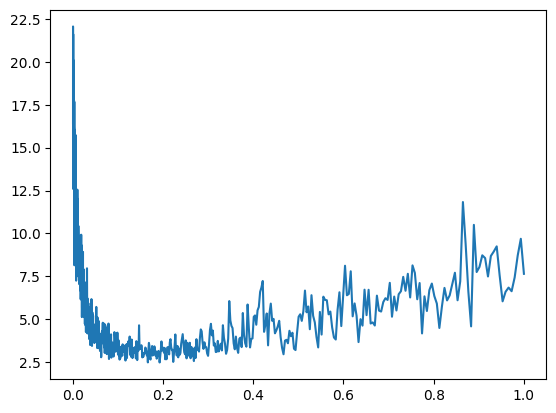

In [172]:
plt.plot(lri, lossi)

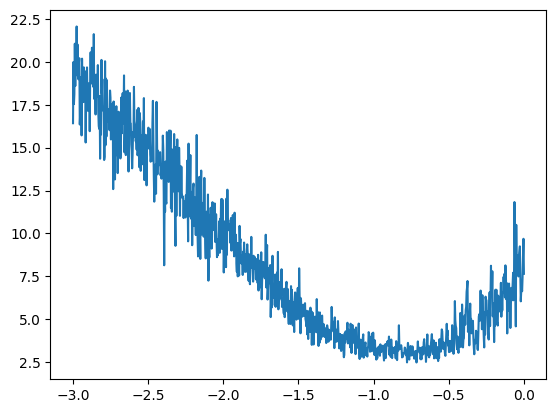

In [173]:
plt.plot(lrie, lossi)

In [174]:
#seems 0.1 is a fairly a good learning rate

In [183]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
# for w in words:
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [184]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [185]:
for p in parameters:
    p.requires_grad = True

In [200]:

for i in range(10000):
    #forward pass
    ix = torch.randint(0, X.shape[0], (32,))
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    # print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    lr = 0.001
    #lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad
print(loss.item())

2.337740898132324


In [201]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.2905, grad_fn=<NllLossBackward0>)

In [193]:
#learning rate decay

In [202]:
#This already surpass the last trained model

In [203]:
#we archieved a lower loss
#that's because we have more parameters, so it can optimize the neuro network. and overfit. Eventually it can achiteve a 

In [207]:
#training split, dev/validation split, test split
#80%， 10%， 10%
#80% is used to optimize the parameters of the model
#the validation split used for all hyper parameters for the model, hyper parameters are for example, the size of hidden layer, 
#the size of embedding, this is 100 for us, we can try different things. You can try different hyper parameters to see which one works for your model
#test split is used to evaluate the performance of the model at the end
#every time, you evaluate the loss from test split, you learned something from it. You are only allowed to evaluate the test split very few times
#otherwise, you will also training your test split



In [208]:
# build the dataset
def build_dataset (words) :
    block_size = 3 # context length: how many characters do we take to predict the next one?
    X, Y= [],[]
    for w in words:
        #print (w)
        context = [0] * block_size
        for ch in w+ '.':
            ix = stoi[ch]
            X. append (context)
            Y. append (ix)
            # print(''.join(itos(i] for i in context), '=>' , itos[ix]))
            context = context[1:] + [ix] # crop and append
    X = torch. tensor (X)
    Y = torch. tensor (Y)
    print (X.shape, Y.shape)
    return X, Y
    
import random 
random. seed (42)
random. shuffle(words)
n1 = int (0.8*len(words) )
n2 = int (0.9*len(words) )
Xtr, Ytr = build_dataset (words [:n1])
Xdev, Ydev = build_dataset(words [n1:n2] )
Xte, Yte = build_dataset (words [n2:] )

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [209]:
len(words)

32033

In [210]:
n1

25626

In [211]:
n2-n1

3203

In [212]:
len(words) - n2

3204

In [213]:
#dataset for training is like this
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [239]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
# for w in words[:5]:
for w in words:
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [242]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [243]:
sum(p.nelement() for p in parameters) # number of parameters in total


3481

In [244]:
for p in parameters:
    p.requires_grad = True

In [245]:
lri = []
lossi = []
stepi = []

In [247]:

for i in range(50000):
    #forward pass
    ix = torch.randint(0, Xtr.shape[0], (32,))
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # lr = lrs[i]
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())

2.3160133361816406


In [250]:
#evaluate on the dev split
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.4017, grad_fn=<NllLossBackward0>)

In [252]:
#evaluate on the training split
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.4012, grad_fn=<NllLossBackward0>)

In [253]:
#so far, we are under fitting as the loss on dev split and training split are the same

In [254]:
#let's increase the size of the neuron network

In [255]:
#let's use 300 nerons now


In [259]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
# for w in words[:5]:
for w in words:
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [260]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [264]:
sum(p.nelement() for p in parameters) # number of parameters in total


10281

In [265]:
for p in parameters:
    p.requires_grad = True

In [267]:
lri = []
lossi = []
stepi = []

In [270]:

for i in range(50000):
    #forward pass
    ix = torch.randint(0, Xtr.shape[0], (32,))
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # lr = lrs[i]
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())

2.5750856399536133


In [272]:
#let's decrease the learning rate
for i in range(50000):
    #forward pass
    ix = torch.randint(0, Xtr.shape[0], (32,))
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())

2.145320177078247


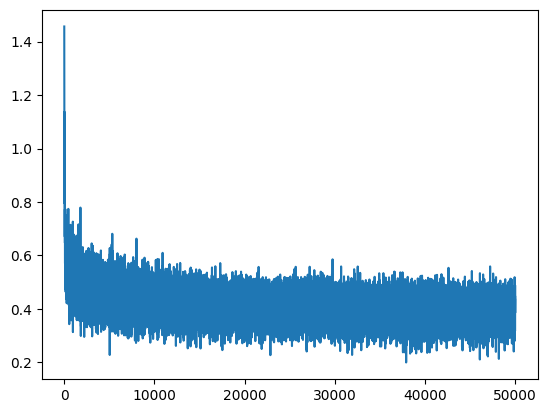

In [269]:
plt.plot(stepi, lossi)

In [271]:
#increase the batch size will optimize it and get a better result

In [273]:
#evaluate on the dev split
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2450, grad_fn=<NllLossBackward0>)

In [274]:
#evaluate on the training split
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.2343, grad_fn=<NllLossBackward0>)

In [275]:
#now even we make the hidden layer much bigger
#it could be that the bottom embedding are 2 dimentional,it can be that we just make too manys characters send it into 2 dimentional spaces

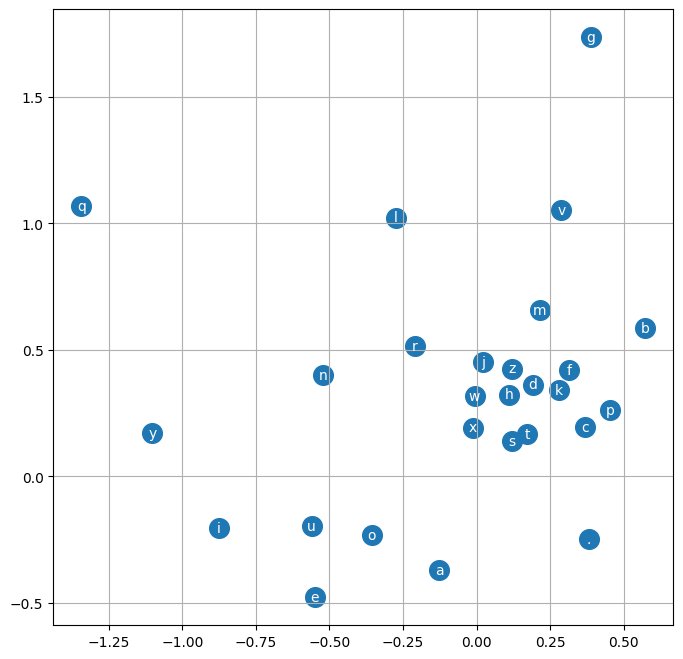

In [276]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [277]:
#now let's increase the embedding dimensions

In [286]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [287]:
sum(p.nelement() for p in parameters) # number of parameters in total


11897

In [288]:
for p in parameters:
    p.requires_grad = True

In [289]:
lri = []
lossi = []
stepi = []

In [299]:

for i in range(50000):
    #forward pass
    ix = torch.randint(0, Xtr.shape[0], (32,))
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # lr = lrs[i]
    #lr = 0.1
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())

1.7720868587493896


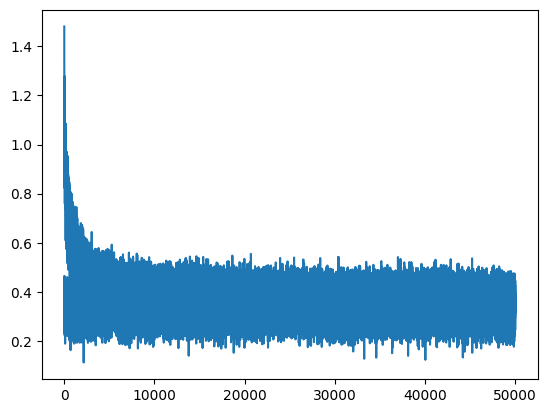

In [300]:
plt.plot(stepi, lossi)

In [301]:
#evaluate on the dev split
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2000, grad_fn=<NllLossBackward0>)

In [302]:
#evaluate on the training split
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1738, grad_fn=<NllLossBackward0>)

In [303]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [304]:
sum(p.nelement() for p in parameters) # number of parameters in total


11897

In [305]:
for p in parameters:
    p.requires_grad = True

In [306]:
lri = []
lossi = []
stepi = []

In [307]:

for i in range(200000):
    #forward pass
    ix = torch.randint(0, Xtr.shape[0], (32,))
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # lr = lrs[i]
    #lr = 0.1
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())

1.803004264831543


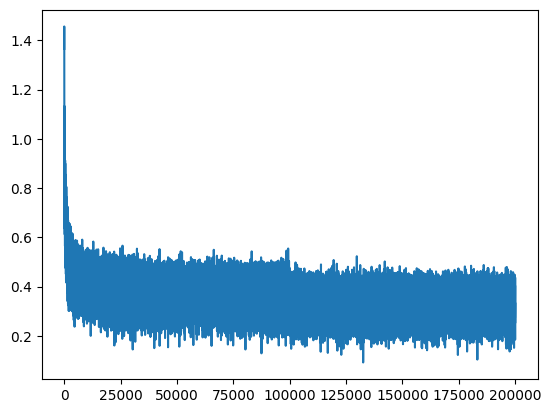

In [308]:
plt.plot(stepi, lossi)

In [309]:
#evaluate on the dev split
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1669, grad_fn=<NllLossBackward0>)

In [310]:
#evaluate on the training split
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1312, grad_fn=<NllLossBackward0>)

In [ ]:
#1. you can change the neurons in the network
#2. You can change the dimensionality of the lookup table
#3. You can change number of characters that feed in as inout as the context
#4 can change the learning rate, how they decay
#5 change the batch size, leades to better convergance speed

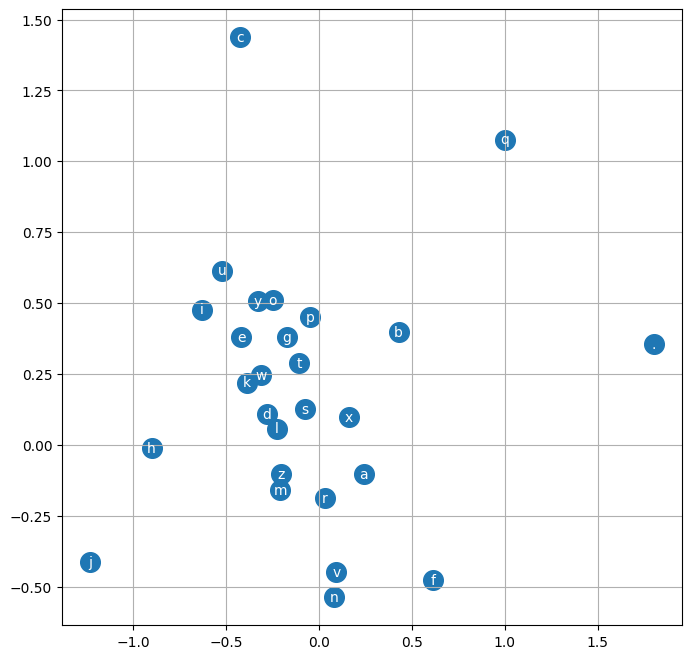

In [311]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [312]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carpah.
amelle.
khi.
mili.
thiyah.
cassie.
mahnevalee.
art.
kaeli.
nellara.
chaiivia.
leigh.
ham.
join.
quinn.
shonne.
liveni.
watell.
dearynix.
kael.
